# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


顔検出が面内回転に対してどれくらい頑強かを評価する。

データベースによっては既に目位置を正規化してあり、
面内回転を加えたデータで評価してはじめて、実際環境での顔検出能力を評価できる。

そこで、このスクリプトでは、データに面内回転を加えた画像を作って
検出率を評価している。


In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
import inference_file_face
import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")
names.sort()

degs=(-45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45)
# degs= degs[:2]

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:

for deg in degs:
    inference_file_face.processDatabase(dataset, names, deg)

# headPose dataset の検出処理後のデータ解析

In [4]:
dfs={}
for deg in degs:
    dfs[deg] = pd.read_csv("log_headPose_%d.csv" % deg)
    print deg, dfs[deg]["truePositives"].mean()

-45 0.22544802867383512
-40 0.2903225806451613
-35 0.3673835125448029
-30 0.4885304659498208
-25 0.5716845878136201
-20 0.6870967741935484
-15 0.7526881720430108
-10 0.7867383512544803
-5 0.8243727598566308
0 0.8458781362007168
5 0.8197132616487455
10 0.7695340501792115
15 0.6824372759856631
20 0.5885304659498208
25 0.46630824372759855
30 0.3849462365591398
35 0.3078853046594982
40 0.24946236559139784
45 0.2111111111111111


In [5]:
rates = [dfs[deg]["truePositives"].mean() for deg in degs]
falseRates = [dfs[deg]["falsePositives"].mean() for deg in degs]
data = {"degs":degs, "rates":rates, "falseRates":falseRates}
df = pd.DataFrame(data, columns=["degs", "rates", "falseRates"])

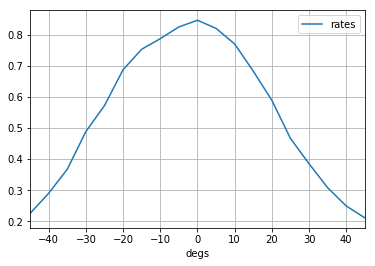

In [6]:
df.plot(x="degs", y="rates", grid=True)

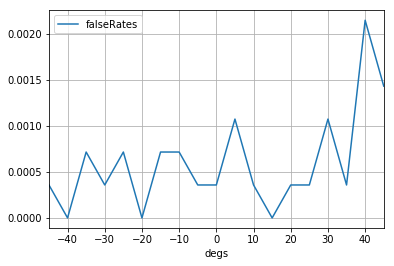

In [7]:
df.plot(x="degs", y="falseRates", grid=True)